In [1]:
from functions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Analytical simulations

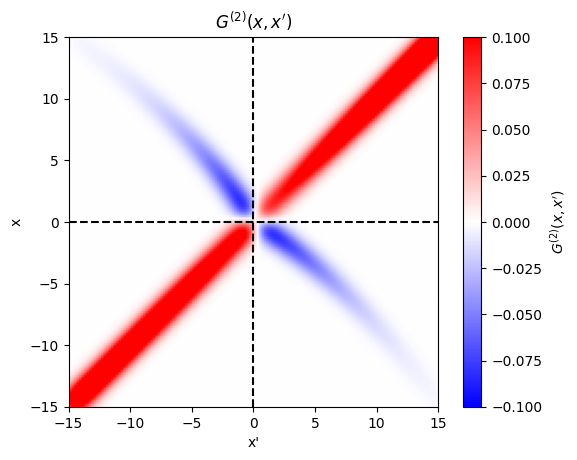

In [3]:
M  = 40
Nx = 200
L  = 40.0
xs = np.linspace(-L/2, L/2, Nx)
sigma = 0.7
n_out = 80.0
n_in  = 60.0
xi_out = 1.0
xi_in  = 1.0
prefactor = np.sqrt(xi_out * xi_in / (n_out * n_in))
alpha_P = np.zeros(M, dtype=complex)
alpha_P[15] = 0

x_out_centers = np.linspace(0.0, 15.0, M)
alpha_hydro   = 0.6
curv          = -0.025
x_in_centers  = -alpha_hydro * x_out_centers + curv * x_out_centers**2

fE, fP = build_mode_functions(xs, x_out_centers, x_in_centers, sigma)

# --- k-sampling and spectra ---
T_H   = 0.2   # Hawking temperature
c_s   = 1.0   # sound speed
k_min = 0.05
k_max = 2.0

k_vals = np.linspace(k_min, k_max, M)

# Hawking thermal occupations -> r(k)
r_k = thermal_r_from_k(k_vals, T_H=T_H, c_s=c_s)

# Bogoliubov static structure factor for density response
S_k = static_structure_factor(k_vals, c_s=c_s, m=1.0)

# Use same S for E and P
G2_bogo_vac = analytic_G2(xs, fE, fP, r=r_k, alpha_P=alpha_P,
                      S_E=S_k, S_P=S_k)
plt.figure()
plt.imshow(G2_bogo_vac*0.15, extent=[xs[0], xs[-1], xs[0], xs[-1]], origin='lower', vmin=-0.1, vmax=0.1, cmap='bwr')
plt.colorbar(label="$G^{(2)}(x,x')$")
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("x'")
plt.ylabel("x")
plt.title(f"$G^{{(2)}} (x,x')$")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

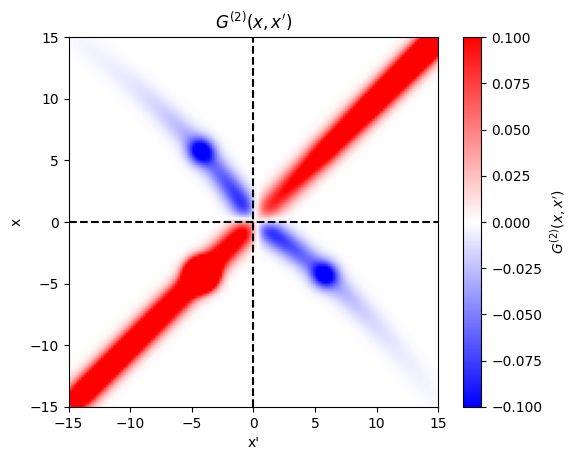

In [4]:
M  = 40
Nx = 200
L  = 40.0
xs = np.linspace(-L/2, L/2, Nx)
sigma = 0.7
n_out = 80.0
n_in  = 60.0
xi_out = 1.0
xi_in  = 1.0
prefactor = np.sqrt(xi_out * xi_in / (n_out * n_in))
alpha_P = np.zeros(M, dtype=complex)
alpha_P[15] = 2

x_out_centers = np.linspace(0.0, 15.0, M)
alpha_hydro   = 0.6
curv          = -0.025
x_in_centers  = -alpha_hydro * x_out_centers + curv * x_out_centers**2

fE, fP = build_mode_functions(xs, x_out_centers, x_in_centers, sigma)

# --- k-sampling and spectra ---
T_H   = 0.2   # Hawking temperature
c_s   = 1.0   # sound speed
k_min = 0.05
k_max = 2.0

k_vals = np.linspace(k_min, k_max, M)

# Hawking thermal occupations -> r(k)
r_k = thermal_r_from_k(k_vals, T_H=T_H, c_s=c_s)

# Bogoliubov static structure factor for density response
S_k = static_structure_factor(k_vals, c_s=c_s, m=1.0)

# Use same S for E and P
G2_bogo_seed = analytic_G2(xs, fE, fP, r=r_k, alpha_P=alpha_P,
                      S_E=S_k, S_P=S_k)
plt.figure()
plt.imshow(G2_bogo_seed*0.15, extent=[xs[0], xs[-1], xs[0], xs[-1]], origin='lower', vmin=-0.1, vmax=0.1, cmap='bwr')
plt.colorbar(label="$G^{(2)}(x,x')$")
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("x'")
plt.ylabel("x")
plt.title(f"$G^{{(2)}} (x,x')$")
plt.xlim(-15, 15)
plt.ylim(-15, 15)
plt.show()

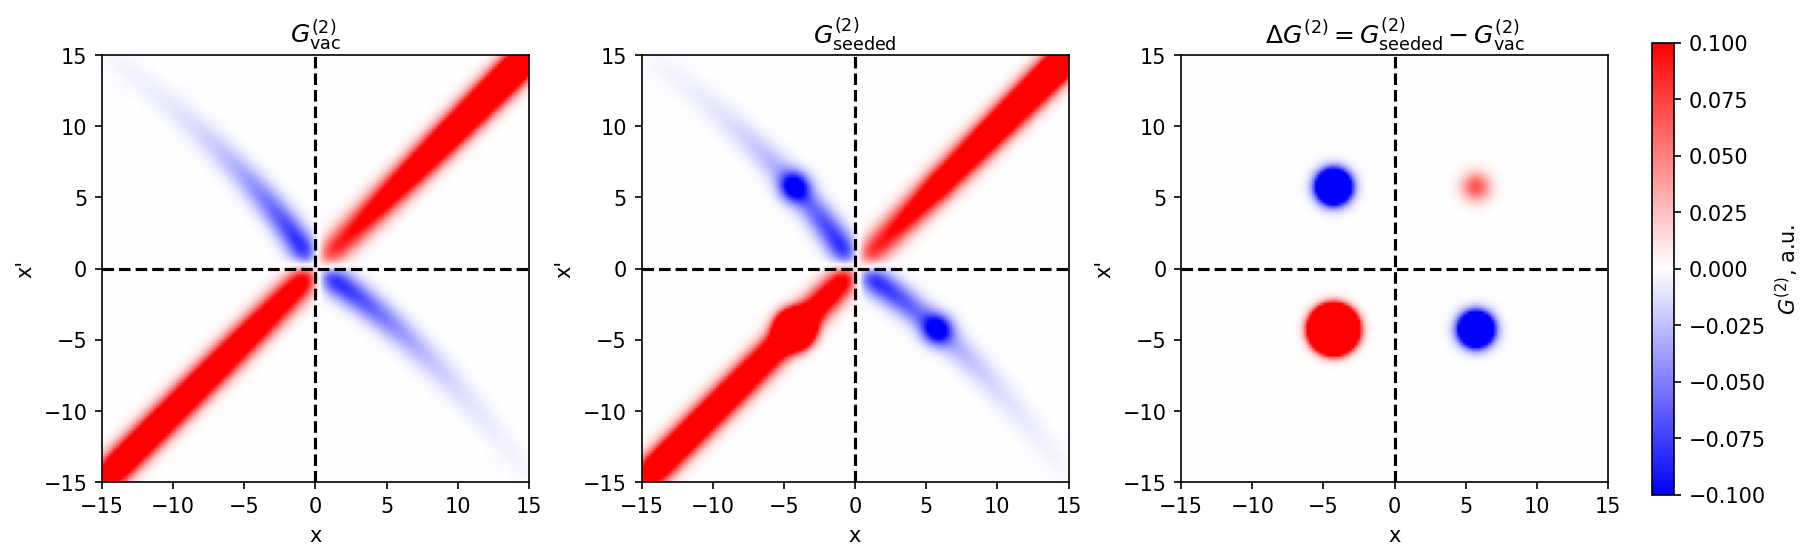

(<Figure size 1800x600 with 4 Axes>,
 array([<Axes: title={'center': '$G^{(2)}_{\\rm vac}$'}, xlabel='x', ylabel="x'">,
        <Axes: title={'center': '$G^{(2)}_{\\rm seeded}$'}, xlabel='x', ylabel="x'">,
        <Axes: title={'center': '$\\Delta G^{(2)} = G^{(2)}_{\\rm seeded} - G^{(2)}_{\\rm vac}$'}, xlabel='x', ylabel="x'">],
       dtype=object))

In [5]:
plot_G2_three_panel(xs, G2_bogo_vac*0.15, G2_bogo_seed*0.15, vmin=-0.1, vmax=0.1)

## Numerical simulations

In [7]:
xs, G2_vac = simulate_hawking_G2_dual_mode_code(
    M=2,
    N_cut=5,
    T_H=0.5,
    alpha_P_bg=0.0,    # no background seed
    j1=0,
    j2=1,
    alpha_code=0.0,    # |0,0> vs |α,α>
    p_code=0.9,
    use_phases=False,  # envelopes only
    k_min=0.2,
    k_max=0.5,
    x_out_min=2.0,
    x_out_max=5.0,
    Nx=200,
)

In [8]:
# simplest: 2 Hawking pairs, code on P0 and P1
xs, G2_code = simulate_hawking_G2_dual_mode_code(
    M=2,
    N_cut=5,
    T_H=0.5,
    alpha_P_bg=0.0,    # no background seed
    j1=0,
    j2=1,
    alpha_code=1,    # |0,0> vs |α,α>
    p_code=0.5,
    use_phases=False,  # envelopes only
    k_min=0.2,
    k_max=0.5,
    x_out_min=2.0,
    x_out_max=5.0,
    Nx=200,
)

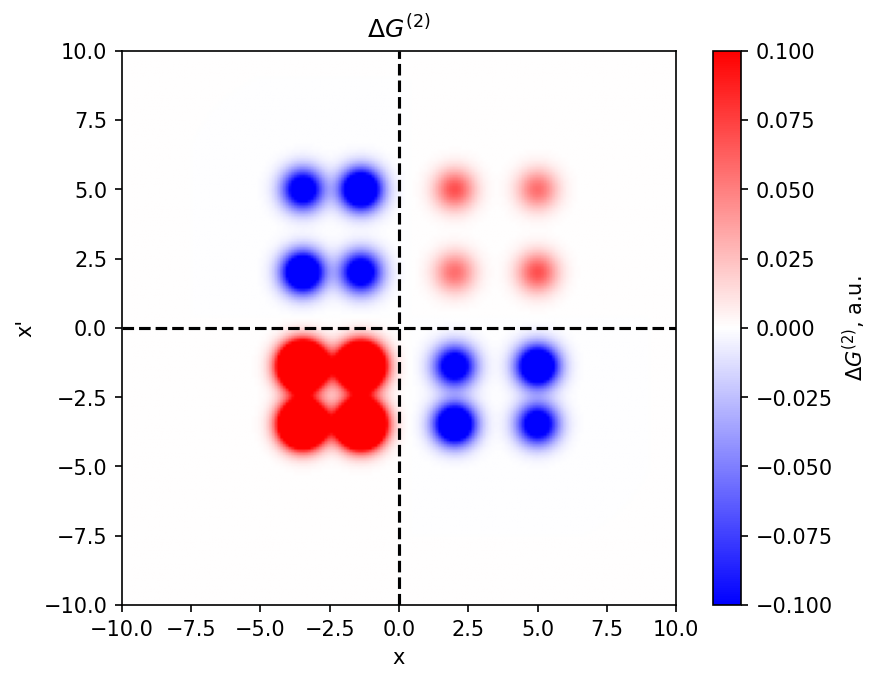

In [9]:
plt.figure(dpi=150)
plt.imshow((G2_code-1*G2_vac)*0.5, extent=[xs[0], xs[-1], xs[0], xs[-1]], origin='lower', vmin=-0.1, vmax=0.1, cmap='bwr')
plt.colorbar(label="$\Delta G^{(2)}$, a.u.")
plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')
plt.xlabel("x")
plt.ylabel("x'")
plt.title(f"$\Delta G^{{(2)}}$")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
# plt.savefig('double_seed.png', bbox_inches='tight', dpi=300)
# plt.savefig('double_seed.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Holevo info

In [11]:
r=0.35;alpha0=0;alpha1=1;
holevo_single_pair_fock(r=r, alpha0=alpha0, alpha1=alpha1, N_cut=10)

0.09334609982617768

In [12]:
# simplest case: 2 Hawking pairs, dual-mode code on P0,P1, look at E0,E1
chi, (rho0_E, rho1_E, rho_avg) = holevo_dual_mode_hawking(
    M=2,
    N_cut=6,
    T_H=0.5,
    alpha_P_bg=0.0,
    j1=0,
    j2=1,
    alpha_code=1.0,
    p_code=0.5,
    return_states=True,
)

print("Holevo χ ≈", chi, "bits")

Holevo χ ≈ 0.17460158141726434 bits
